# Task 1 - Analysis on ML Test Scores

## Dataset Description
- Batch: Batch name
- User_ID: Unique student ID
- Score: Score out of 7

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving scores_data.csv to scores_data.csv


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("scores_data.csv")

In [ ]:
df.head()

Batch  User_ID     Score   
0  AI_ELITE_7  uid_149      06-Jul
1  AI_ELITE_7  uid_148      06-Jul
2  AI_ELITE_7  uid_147      07-Jul
3  AI_ELITE_7  uid_146      07-Jul
4  AI_ELITE_7  uid_145      04-Jul

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [27]:
df.columns = df.columns.str.strip().str.lower()

In [28]:
df.columns.tolist()


['batch', 'user_id', 'score']

In [29]:
df.isnull().sum()

batch      0
user_id    0
score      0
dtype: int64

In [30]:
df['score'] = (
    df['score']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)


In [31]:
print("Average Score:", df['score'].mean())
print("Minimum Score:", df['score'].min())
print("Maximum Score:", df['score'].max())


Average Score: 4.382550335570469
Minimum Score: 0.0
Maximum Score: 7.0


In [32]:
df['batch'].unique()


array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [33]:
batch_summary = df.groupby('batch').agg(
    students=('user_id', 'count'),
    avg_score=('score', 'mean'),
    min_score=('score', 'min'),
    max_score=('score', 'max')
).reset_index()

batch_summary

batch  students  avg_score  min_score  max_score
0  AI_ELITE_4        48   3.791667        0.0        7.0
1  AI_ELITE_6        48   4.229167        0.0        7.0
2  AI_ELITE_7        53   5.056604        2.0        7.0

In [34]:
batch_summary.loc[batch_summary['avg_score'].idxmax()]


batch        AI_ELITE_7
students             53
avg_score      5.056604
min_score           2.0
max_score           7.0
Name: 2, dtype: object

In [35]:
batch_summary.loc[batch_summary['avg_score'].idxmin()]

batch        AI_ELITE_4
students             48
avg_score      3.791667
min_score           0.0
max_score           7.0
Name: 0, dtype: object

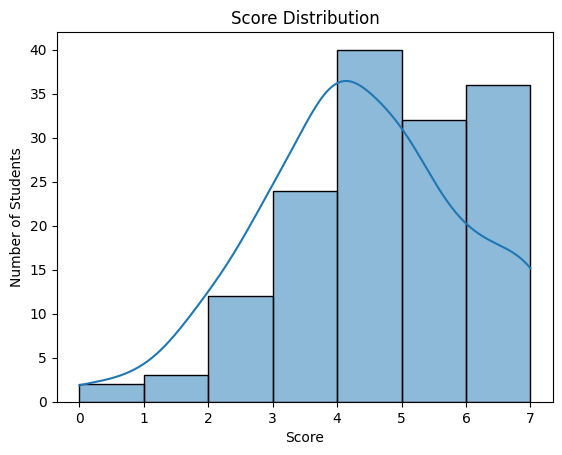

In [36]:
plt.figure()
sns.histplot(df['score'], bins=7, kde=True)
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()

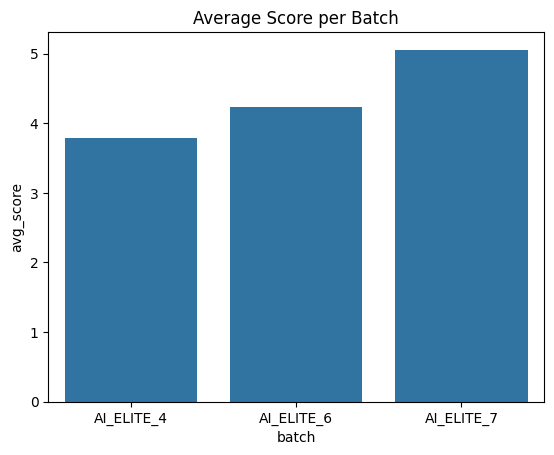

In [37]:
plt.figure()
sns.barplot(x='batch', y='avg_score', data=batch_summary)
plt.title("Average Score per Batch")
plt.show()

In [38]:
plt.figure()
sns.boxplot(x='batch', y='score', data=df)
plt.title("Score Spread by Batch")
plt.show()

In [39]:
df.sort_values(by='score', ascending=False).head(10)

batch  user_id  score
2   AI_ELITE_7  uid_147    7.0
3   AI_ELITE_7  uid_146    7.0
15  AI_ELITE_7  uid_134    7.0
7   AI_ELITE_7  uid_142    7.0
5   AI_ELITE_7  uid_144    7.0
17  AI_ELITE_7  uid_132    7.0
19  AI_ELITE_7  uid_130    7.0
16  AI_ELITE_7  uid_133    7.0
74  AI_ELITE_6   uid_75    7.0
67  AI_ELITE_6   uid_82    7.0

In [40]:
df['score'].value_counts().sort_index()


score
0.0     2
1.0     3
2.0    12
3.0    24
4.0    40
5.0    32
6.0    18
7.0    18
Name: count, dtype: int64